In [40]:
import cv2
import numpy as np 
from glob import glob
import os
from itertools import chain
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
#%run GP Thresholding segmentation Full version(jpg).ipynb

In [23]:
def get_images_from_path (images_path):
    '''
    Take   : Path of images and read all images using cv2
    return : List of images
    '''
    all_images = glob(os.path.join(images_path,'*.jpg'))
    pictures = []
    for image in all_images:
        picture = cv2.imread(image) 
        picture = np.array(picture)
        pictures.append(picture)
    return pictures

In [24]:
def Prepare_for_model(images):
    '''
    Take   : List of images (The return of get_images_from_path fn)
    Return : List of images after resizing it and put it in array form
    '''
    temp=[]
    for img in images:
        img = cv2.resize(img, dsize=(125,125))
        img = np.array(img, dtype=np.float32)
        temp.append(img)
    Prepared_images = np.array(list(temp))
    return Prepared_images

In [25]:
def Normalize(images):
    '''
    Take   : List of images (The return of Prepare_for_splitting fn)
    return : List of images after normalizing
    '''
    return images / 255

In [26]:
def Reshape(images):
    '''
    Take   : List of images (The return of Normalize fn)
    return : List of images after Reshaping
    '''
    dataset_size = len(images)
    return images.reshape(dataset_size , -1)

In [27]:
def Prepare_labels(a_images , b_images , d_images , g_images):
    '''
    Take   : List of images of each class
    return : List of labels
    '''
    y = [1 , 2  , 3 , 4]
    y[0] = np.repeat(y[0] , len(a_images))
    y[1] = np.repeat(y[1] , len(b_images))
    y[2] = np.repeat(y[2] , len(d_images))
    y[3] = np.repeat(y[3] , len(g_images))
    y = [j for sub in y for j in sub]
    y = np.array(y)
    return y

In [33]:
def all_preprcessing():
    '''
    Take   : Nothing
    Return : Training and testing images after resizing and normalizing (that are prepared to use in any model) and their labels
    '''
    a_images_train = get_images_from_path('F:/categories Train JPG/A')
    b_images_train = get_images_from_path('F:/categories Train JPG/B')
    d_images_train = get_images_from_path('F:/categories Train JPG/D')
    g_images_train = get_images_from_path('F:/categories Train JPG/G')
    
    a_images_test = get_images_from_path('F:/categories Test JPG/A')
    b_images_test = get_images_from_path('F:/categories Test JPG/B')
    d_images_test = get_images_from_path('F:/categories Test JPG/D')
    g_images_test = get_images_from_path('F:/categories Test JPG/G')
    
    x_train = a_images_train + b_images_train + d_images_train + g_images_train
    x_train = np.array(x_train)
    
    x_test = a_images_test + b_images_test + d_images_test + g_images_test
    x_test = np.array(x_test)
    
    y_train = Prepare_labels(a_images_train , b_images_train , d_images_train , g_images_train)
    
    y_test  = Prepare_labels(a_images_test , b_images_test , d_images_test , g_images_test)
    
    
    #X_train, X_test, y_train, y_test = train_test_split(x , y , test_size = 0.30 , random_state = 42 , shuffle = True)
    
    training_data = Prepare_for_model(x_train)
    testing_data  = Prepare_for_model(x_test)
    
    training_imags_divided = Normalize(training_data)
    testing_images_divided = Normalize(testing_data)
    
    training_imags_divided = Reshape(training_imags_divided)
    testing_images_divided = Reshape(testing_images_divided)
    return training_imags_divided , y_train , testing_images_divided , y_test

In [34]:
training_imags_divided , y_train , testing_images_divided , y_test = all_preprcessing()

In [35]:
print(training_imags_divided.shape)
print(y_train.shape)
print(testing_images_divided.shape)
print(y_test.shape)

(11400, 46875)
(11400,)
(2774, 46875)
(2774,)


In [37]:
clf = svm.SVC()
clf.fit(training_imags_divided , y_train)

SVC()

In [53]:
y_predict = clf.predict(testing_images_divided)

In [56]:
print(accuracy_score(y_test , y_predict))

0.6023792357606345


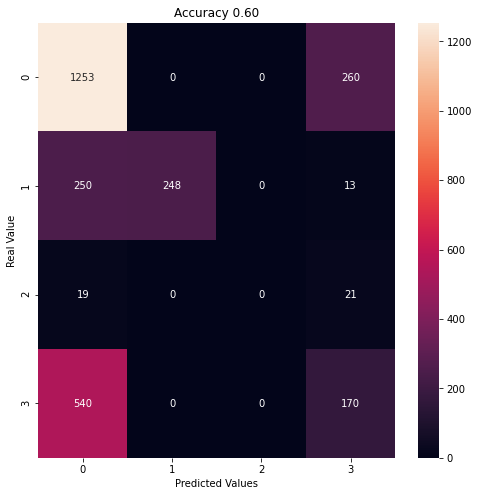

In [61]:
from sklearn import metrics
import seaborn as sns

Confusion_Mtrx = metrics.confusion_matrix(y_test, y_predict)
#true_positive , false_positive, false_negative, true_negative = Confusion_Mtrx.ravel()

plt.figure(figsize=(8,8))
sns.heatmap(Confusion_Mtrx, annot=True, fmt=".0f");
plt.ylabel('Real Value');
plt.xlabel('Predicted Values');
plt.title('Accuracy {0:.2f}'.format(accuracy_score(y_test , y_predict)));


In [ ]:
#A goog
#b preprocessing
#d more training examples 
#G may be preprocessing 
